## 线性回归

In [1]:
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd

### 单元线性回归

In [2]:
data1=pd.read_csv('./ex1data1.txt',header=None,names=['x','y'])
data1.head(),data1.describe()

(        x        y
 0  6.1101  17.5920
 1  5.5277   9.1302
 2  8.5186  13.6620
 3  7.0032  11.8540
 4  5.8598   6.8233,
                x          y
 count  97.000000  97.000000
 mean    8.159800   5.839135
 std     3.869884   5.510262
 min     5.026900  -2.680700
 25%     5.707700   1.986900
 50%     6.589400   4.562300
 75%     8.578100   7.046700
 max    22.203000  24.147000)

#### 原始数据点图

<AxesSubplot:xlabel='x', ylabel='y'>

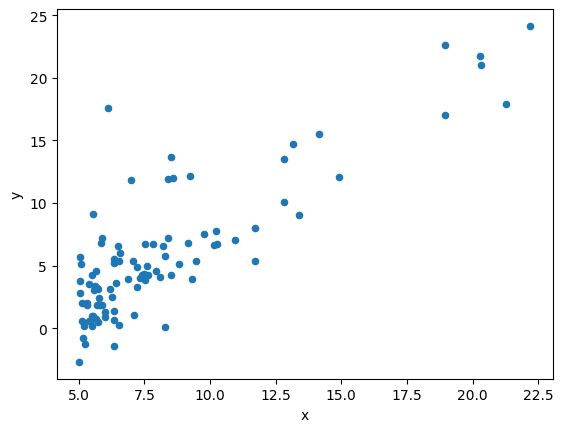

In [3]:
data1.plot(x='x',y='y',kind='scatter')

#### 均值归一化计算函数

In [4]:
# (样本-样本平均值)/样本最大值
def mean_normalization(data,avg,max):
    return [ (item-avg)/max for item in data]
mean_normalization([1,2,3],2,3)

[-0.3333333333333333, 0.0, 0.3333333333333333]

#### 特征缩放计算函数

In [5]:
# 样本/样本最大值
def feature_scaling(data,max):
    return [ item/max for item in data]

#### 计算最大值，均值

In [6]:
data1_x_max=data1['x'].max()
data1_y_max=data1['y'].max()
data1_x_avg=data1['x'].mean()
data1_y_avg=data1['y'].mean()
data1_x_max,data1_y_max,data1_x_avg,data1_y_avg

(22.203, 24.147, 8.159799999999999, 5.839135051546393)

#### 均值归一化后结果集合

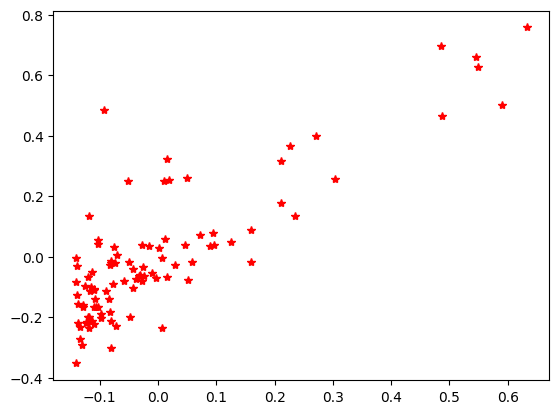

In [7]:
data1_x_mn=mean_normalization(data1['x'],data1_x_avg,data1_x_max)
data1_y_mn=mean_normalization(data1['y'],data1_y_avg,data1_y_max)
plt.plot(data1_x_mn,data1_y_mn,'r*')
plt.show()

#### 特征缩放后结果集合

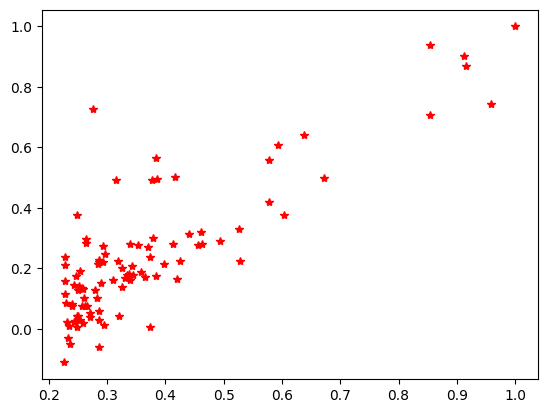

In [8]:
data1_x_fs=feature_scaling(data1['x'],data1_x_max)
data1_y_fs=feature_scaling(data1['y'],data1_y_max)
plt.plot(data1_x_fs,data1_y_fs,'r*')
plt.show()

#### 代价函数

In [9]:
def compute_cost(x,y,theta):
    tmp=nm.power((x*theta.T-y),2)
    return nm.sum(tmp)/(2*len(x))
# f=2x+3
compute_cost(nm.matrix([[1,1],[1,2],[1,3]]),nm.matrix([[5],[7],[9]]),nm.matrix([3,2.1]))

0.023333333333333404

#### 批量梯度下降

In [10]:
def gradient_descent(x,y,theta,alpha,itr):
    temp = nm.matrix(nm.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = nm.zeros(itr)
    for i in range(itr):
        tmp1=x*theta.T-y
        for j in range(parameters):
            tmp2=nm.multiply(tmp1,x[:,j])
            temp[0,j]=temp[0,j]-alpha/len(x)*nm.sum(tmp2)
        theta=temp
        cost[i]=compute_cost(x,y,theta)
    return theta,cost
#简单测试
theta=nm.matrix([0,0])
alpha=0.03
# f=2x+3
x_array=[1,2,3,4,5,6,7,8]
y_array=[5,7,9,10,13,14,15,19]
x=nm.matrix([[1,i] for i in x_array])
y=nm.matrix([[i] for i in y_array])
g,cost=gradient_descent(x,y,theta,alpha,10000)
c=compute_cost(x,y,g)
g,c

(matrix([[3.14285714, 1.85714286]]), 0.19642857142857137)

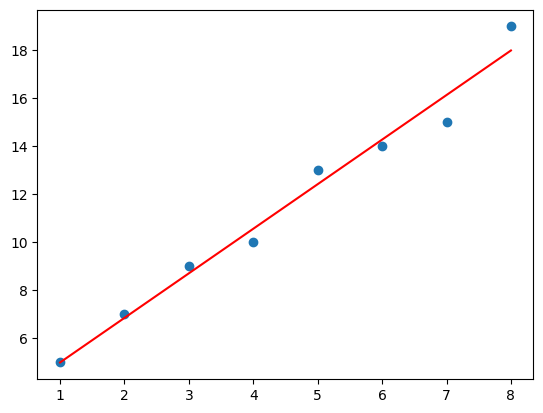

In [11]:
xT = nm.linspace(x_array[0], x_array[len(x_array)-1], 100)
f = g[0, 0] + (g[0, 1] * xT)
fig, ax = plt.subplots()
ax.plot(xT, f, 'r', label='Prediction')
ax.scatter(x_array, y_array, label='Traning Data')
plt.show()

#### 测试数据集1计算线性回归

In [12]:
theta=nm.matrix([0,0])
alpha=0.01
iters=1000
x1=nm.matrix([[1,i] for i in data1['x'].values])
y1=nm.matrix([[i] for i in data1['y'].values])
x1.shape,theta.shape,y1.shape

((97, 2), (1, 2), (97, 1))

In [13]:
g,cost=gradient_descent(x1,y1,theta,alpha,iters)
c=compute_cost(x1,y1,g)
g,c

(matrix([[-3.24140214,  1.1272942 ]]), 4.515955503078914)

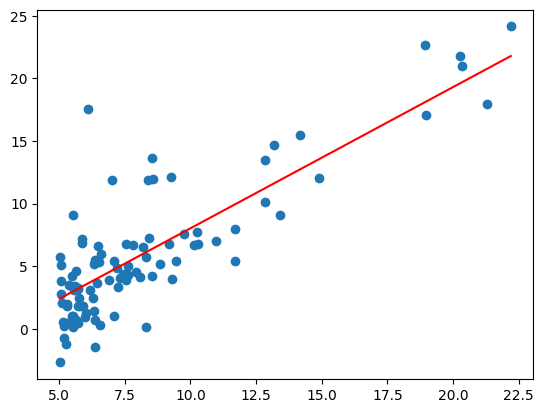

In [14]:
xT = nm.linspace(data1['x'].min(),data1['x'].max(), 100)
f = g[0, 0] + (g[0, 1] * xT)
fig, ax = plt.subplots()
ax.plot(xT, f, 'r', label='Prediction')
ax.scatter(data1['x'], data1['y'], label='Traning Data')
plt.show()

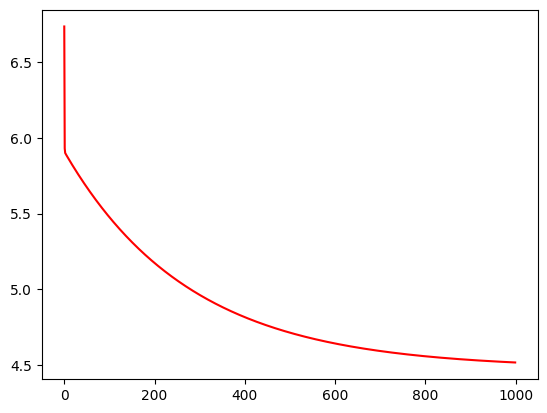

In [15]:
fig, ax = plt.subplots()
ax.plot(nm.arange(iters), cost, 'r')
plt.show()

### 多元线性回归

#### 读取数据

In [16]:
data=pd.read_csv('./ex1data2.txt',names=['a','b','c'])
data.head(),data.describe()

(      a  b       c
 0  2104  3  399900
 1  1600  3  329900
 2  2400  3  369000
 3  1416  2  232000
 4  3000  4  539900,
                  a          b              c
 count    47.000000  47.000000      47.000000
 mean   2000.680851   3.170213  340412.659574
 std     794.702354   0.760982  125039.899586
 min     852.000000   1.000000  169900.000000
 25%    1432.000000   3.000000  249900.000000
 50%    1888.000000   3.000000  299900.000000
 75%    2269.000000   4.000000  384450.000000
 max    4478.000000   5.000000  699900.000000)

#### pd库均值归一化

In [17]:
data=(data-data.mean())/data.max()
data.head()

,a,b,c
0,0.023073,-0.034043,0.084994
1,-0.089478,-0.034043,-0.015020
2,0.089174,-0.034043,0.040845
3,-0.130567,-0.234043,-0.154897
4,0.223162,0.165957,0.285023


#### 数据预处理

In [18]:
data.insert(0,'#',1)
cols=data.shape[1]
x=data.iloc[:,0:cols-1]
y=data.iloc[:,0:cols-1:cols]
x.head(),y.head()

(   #         a         b
 0  1  0.023073 -0.034043
 1  1 -0.089478 -0.034043
 2  1  0.089174 -0.034043
 3  1 -0.130567 -0.234043
 4  1  0.223162  0.165957,
    #
 0  1
 1  1
 2  1
 3  1
 4  1)

#### 参数调整

In [19]:
theta=nm.matrix([0,0,0])
alpha=0.03
iters=1000
x_matrix=nm.matrix(x.values)
y_matrix=nm.matrix(y.values)
x_matrix.shape,y_matrix.shape,theta.shape

((47, 3), (47, 1), (1, 3))

#### 执行批量梯度下降

In [20]:
g,cost=gradient_descent(x_matrix,y_matrix,theta,alpha,iters)
g

matrix([[1.00000000e+00, 3.32804739e-18, 4.36306737e-17]])

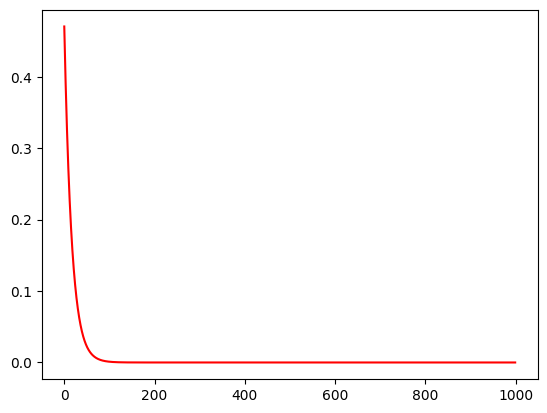

In [21]:
fig, ax = plt.subplots()
ax.plot(nm.arange(iters), cost, 'r')
plt.show()

### 正规方程求解线性回归

In [22]:
g=nm.linalg.inv(x_matrix.T*x_matrix)*x_matrix.T*y_matrix
g

matrix([[ 1.00000000e+00],
        [ 3.33066907e-16],
        [-3.33066907e-16]])